In [1]:
%%capture
!pip install -U spacy

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("topSongsLyrics1950_2019.csv")
df["lyrics"] = df.lyrics.astype(str)
df.shape

(700, 5)

In [3]:
df

,year,rank,artist,song,lyrics
0,1950,1,Fats Domino,The Fat Man,"They call, they call me the fat man|'Cause I w..."
1,1950,2,Percy Mayfield,Please Send Me Someone To Love,"Understanding and peace of mind|But, if it's n..."
2,1950,3,Ruth Brown,Teardrops From My Eyes,I think of you|And that's the time|I feel so b...
3,1950,4,Nat King Cole,Mona Lisa,"Mona Lisa, Mona Lisa, men have named you|You'r..."
4,1950,5,Patti Page,Tennessee Waltz,When an old friend I happened to see|I Introdu...
...,...,...,...,...,...
695,2019,6,Jonas Brothers,Sucker,"We go together|Better than birds of a feather,..."
696,2019,7,Ariana Grande,7 rings,"Yeah, breakfast at Tiffany's and bottles of bu..."
697,2019,8,Travis Scott,Highest in the Room,I got room in my fumes (Yeah)|She fill my mind...
698,2019,9,Cardi B and Bruno Mars,Please Me,"Uh, uh, yeah, come on|Please me, baby|Turn aro..."


# Chequear un poco el Dataset

count       700.000000
mean       2840.760000
std       11762.900841
min           3.000000
25%        1029.250000
50%        1481.500000
75%        2241.750000
max      247132.000000
Name: lyrics, dtype: float64

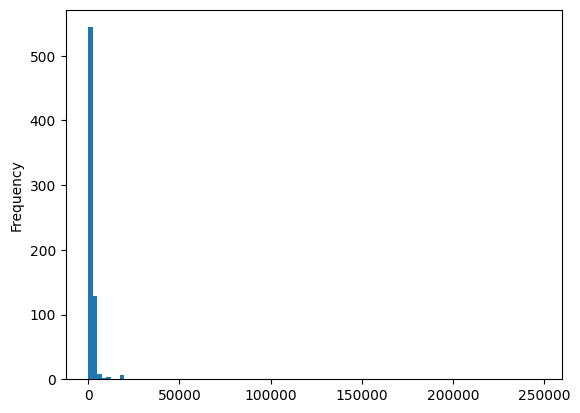

In [4]:
count = df.lyrics.str.len()  # Conteo de Caracteres
count.plot(kind="hist", bins=100)
count.agg(["min", "max"])

count.describe()

min        1
max    43624
Name: lyrics, dtype: int64

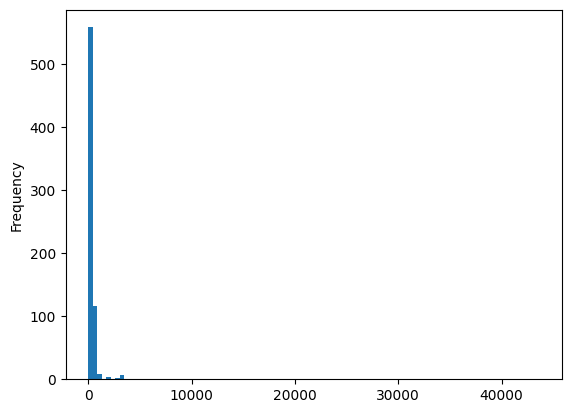

In [5]:
words_count = df.lyrics.str.split().apply(len)
words_count.plot(kind="hist", bins=100)

words_count.agg(["min", "max"])

In [6]:
words_count.describe()

count      700.000000
mean       476.938571
std       2022.291010
min          1.000000
25%        173.750000
50%        246.500000
75%        380.250000
max      43624.000000
Name: lyrics, dtype: float64

In [7]:
words_count.quantile(0.95)
words_count.quantile(0.85)

505.29999999999995

109


<AxesSubplot:ylabel='Frequency'>

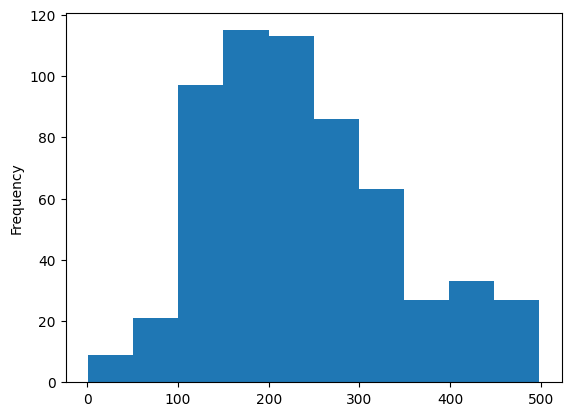

In [8]:
idx = words_count.loc[lambda x: x > 500].index
print(len(idx))
df.drop(index=idx).lyrics.str.split().apply(len).plot(kind="hist")

In [9]:
df.loc[idx].lyrics.tolist()

[" Frailty, thy name is WOMAN.”| The Earth waits for her Queen.”|The connection between these quotations may not be obvious, but it is strict. Yet would any contradict us, if we made them applicable to the other side, and began also,|Frailty, thy name is MAN.|The Earth waits for its King?|Yet Man, if not yet fully installed in his powers, has given much earnest of his claims. Frail he is indeed,—how frail! how impure! Yet often has the vein of gold displayed itself amid the baser ores, and Man has appeared before us in princely promise worthy of his future.|If, oftentimes, we see the prodigal son feeding on the husks in the fair field no more his own, anon we raise the eyelids, heavy from bitter tears, to behold in him the radiant apparition of genius and love, demanding not less than the all of goodness, power and beauty. We see that in him the largest claim finds a due foundation. That claim is for no partial sway, no exclusive possession. He cannot be satisfied with any one gift of 

In [10]:
df_clean = df.drop(index=idx).reset_index(drop=True)
df_clean

,year,rank,artist,song,lyrics
0,1950,1,Fats Domino,The Fat Man,"They call, they call me the fat man|'Cause I w..."
1,1950,2,Percy Mayfield,Please Send Me Someone To Love,"Understanding and peace of mind|But, if it's n..."
2,1950,3,Ruth Brown,Teardrops From My Eyes,I think of you|And that's the time|I feel so b...
3,1950,4,Nat King Cole,Mona Lisa,"Mona Lisa, Mona Lisa, men have named you|You'r..."
4,1950,5,Patti Page,Tennessee Waltz,When an old friend I happened to see|I Introdu...
...,...,...,...,...,...
586,2019,6,Jonas Brothers,Sucker,"We go together|Better than birds of a feather,..."
587,2019,7,Ariana Grande,7 rings,"Yeah, breakfast at Tiffany's and bottles of bu..."
588,2019,8,Travis Scott,Highest in the Room,I got room in my fumes (Yeah)|She fill my mind...
589,2019,9,Cardi B and Bruno Mars,Please Me,"Uh, uh, yeah, come on|Please me, baby|Turn aro..."


# Spacy

In [11]:
import spacy
from spacy import displacy

nlp = spacy.load("es_core_news_sm")
doc = nlp(
    "San Francisco es una ciudad, mientras que Sam Altman de OpenAI es algo distinto. Google o Meta, es otra oración."
)
displacy.render(doc, style="ent")

In [12]:
for sent in doc.sents:
    print(sent.text)
    print("-------")

San Francisco es una ciudad, mientras que Sam Altman de OpenAI es algo distinto.
-------
Google o Meta, es otra oración.
-------


In [13]:
def extract_entities(doc, doc_index=0):
    data_list = []
    for token in doc.ents:
        data = dict()
        data["doc_index"] = doc_index
        data["Text"] = token.text
        data["Label"] = token.label_
        data_list.append(data)

    return data_list


pd.DataFrame(extract_entities(doc))

,doc_index,Text,Label
0,0,San Francisco,LOC
1,0,Sam Altman,PER
2,0,OpenAI,MISC
3,0,Google,ORG
4,0,Meta,ORG


In [14]:
def extract_info(doc, doc_index=0):
    data_list = []
    for token in doc:
        data = dict()
        data["doc_index"] = doc_index
        data["Text"] = token.text
        data["iob_ent"] = token.ent_iob_
        data["ent_type"] = token.ent_type_
        data_list.append(data)

    return data_list


pd.DataFrame(extract_info(doc))

,doc_index,Text,iob_ent,ent_type
0,0,San,B,LOC
1,0,Francisco,I,LOC
2,0,es,O,
3,0,una,O,
4,0,ciudad,O,
5,0,",",O,
6,0,mientras,O,
7,0,que,O,
8,0,Sam,B,PER
9,0,Altman,I,PER


In [15]:
lemmatizer = nlp.get_pipe("lemmatizer")
doc = nlp("Cuál es o era tu problema, poder o podría?")

[token.lemma_ for token in doc]

['cuál', 'ser', 'o', 'ser', 'tu', 'problema', ',', 'poder', 'o', 'poder', '?']

# Volvamos al Modelo

In [16]:
def extract_spacy_info(doc, doc_index=0):
    data_list = []
    for token in doc:
        data = dict()
        data["doc_index"] = doc_index
        data["Text"] = token.text
        data["Lemma"] = token.lemma_
        data["ent_iob"] = token.ent_iob_
        data["ent_type"] = token.ent_type_
        data["POS"] = token.pos_
        data["is_alpha"] = token.is_alpha
        data["Stop"] = token.is_stop
        data_list.append(data)
    return data_list


pd.DataFrame(extract_spacy_info(doc))

,doc_index,Text,Lemma,ent_iob,ent_type,POS,is_alpha,Stop
0,0,Cuál,cuál,B,LOC,PRON,True,True
1,0,es,ser,O,,AUX,True,True
2,0,o,o,O,,CCONJ,True,True
3,0,era,ser,O,,AUX,True,True
4,0,tu,tu,O,,DET,True,True
5,0,problema,problema,O,,NOUN,True,False
6,0,",",",",O,,PUNCT,False,False
7,0,poder,poder,O,,NOUN,True,True
8,0,o,o,O,,CCONJ,True,True
9,0,podría,poder,O,,AUX,True,True


In [17]:
%%capture
## Descargar el Modelo necesario
!python -m spacy download en_core_web_sm

In [18]:
nlp = spacy.load("en_core_web_sm")

data = []
# No es buena idea iterar en Pandas, pero de hacerlo, mejor cambiar a Numpy.
for idx, text in enumerate(df_clean.lyrics.values):
    doc = nlp(text)
    data.extend(extract_spacy_info(doc, doc_index=idx))

spacy_df = pd.DataFrame(data)

In [19]:
spacy_df

,doc_index,Text,Lemma,ent_iob,ent_type,POS,is_alpha,Stop
0,0,They,they,O,,PRON,True,True
1,0,call,call,O,,VERB,True,True
2,0,",",",",O,,PUNCT,False,False
3,0,they,they,O,,PRON,True,True
4,0,call,call,O,,VERB,True,True
...,...,...,...,...,...,...,...,...
176732,590,run,run,O,,VERB,True,False
176733,590,away,away,O,,ADV,True,False
176734,590,",",",",O,,PUNCT,False,False
176735,590,run,run,O,,VERB,True,False


In [20]:
# Crear una lista de Stopwords...
stopwords = spacy_df.query("Stop == True").Text.tolist()
stopwords = list(set([word.lower() for word in stopwords]))
stopwords

['whose',
 'my',
 'below',
 'those',
 'some',
 'somehow',
 'nobody',
 'seemed',
 'now',
 'also',
 "'d",
 'down',
 'get',
 'whole',
 'quite',
 'become',
 'together',
 'under',
 'does',
 'others',
 'towards',
 'none',
 'onto',
 'full',
 'has',
 'upon',
 'throughout',
 'ever',
 'when',
 'both',
 'six',
 'least',
 'this',
 'again',
 'often',
 'behind',
 'done',
 'anything',
 'doing',
 'of',
 'anyway',
 'put',
 'must',
 'although',
 'between',
 "n't",
 'into',
 'on',
 'but',
 'else',
 'most',
 'always',
 'up',
 'something',
 'due',
 'there',
 'who',
 'twenty',
 'have',
 'next',
 'much',
 'why',
 'if',
 'made',
 'how',
 'own',
 'she',
 'four',
 'you',
 'becomes',
 'top',
 'that',
 'across',
 '’m',
 'empty',
 'within',
 'while',
 'had',
 'everything',
 'two',
 'everywhere',
 'myself',
 'every',
 'were',
 'well',
 'our',
 'show',
 'twelve',
 'front',
 '’re',
 'them',
 'five',
 'keep',
 'alone',
 'third',
 'bottom',
 'never',
 'being',
 'just',
 'meanwhile',
 '’ve',
 'her',
 '’s',
 'which',
 's

In [21]:
def retokenizer(df_clean, column):
    clean_text_list = []
    for idx, text in enumerate(df_clean[column].values):
        doc = nlp(text)
        clean_text = " ".join(
            [token.text for token in doc if token.is_alpha and token.pos_ != "PRON"]
        )
        clean_text_list.append(clean_text)
    return clean_text_list


df_clean["clean_lyrics"] = retokenizer(df_clean, column="lyrics")
df_clean

,year,rank,artist,song,lyrics,clean_lyrics
0,1950,1,Fats Domino,The Fat Man,"They call, they call me the fat man|'Cause I w...",call call the fat weight two hundred the girls...
1,1950,2,Percy Mayfield,Please Send Me Someone To Love,"Understanding and peace of mind|But, if it's n...",Understanding and peace of if not asking too s...
2,1950,3,Ruth Brown,Teardrops From My Eyes,I think of you|And that's the time|I feel so b...,think of the feel so the rain starts to love c...
3,1950,4,Nat King Cole,Mona Lisa,"Mona Lisa, Mona Lisa, men have named you|You'r...",Mona Lisa Mona Lisa men have named so like the...
4,1950,5,Patti Page,Tennessee Waltz,When an old friend I happened to see|I Introdu...,When an old friend happened to Introduced to l...
...,...,...,...,...,...,...
586,2019,6,Jonas Brothers,Sucker,"We go together|Better than birds of a feather,...",go than birds of a feather and change the weat...
587,2019,7,Ariana Grande,7 rings,"Yeah, breakfast at Tiffany's and bottles of bu...",Yeah breakfast at Tiffany and bottles of with ...
588,2019,8,Travis Scott,Highest in the Room,I got room in my fumes (Yeah)|She fill my mind...,got room in fumes fill mind up with the highes...
589,2019,9,Cardi B and Bruno Mars,Please Me,"Uh, uh, yeah, come on|Please me, baby|Turn aro...",Uh uh yeah come around and just tease know wan...


In [22]:
def create_additional_features(clean_text, raw_text, spacy_df):
    feature_dict = dict()

    # Número de Líneas...
    feature_dict["n_lines"] = raw_text.str.split("|").apply(len)
    feature_dict["n_words_clean"] = (
        clean_text.str.replace("|", " ").str.split().apply(len)
    )
    feature_dict["n_words"] = raw_text.str.replace("|", " ").str.split().apply(len)
    feature_dict["n_chars_clean"] = clean_text.str.len()
    feature_dict["n_chars"] = raw_text.str.replace("|", " ").str.len()

    pos_df = (
        spacy_df.groupby(["doc_index", "POS"], as_index=False)
        .size()
        .pivot(index="doc_index", columns="POS")
        .fillna(0)
    )

    pos_df.columns = pos_df.columns.droplevel()

    return pd.DataFrame(feature_dict).join(pos_df)


create_additional_features(df_clean["clean_lyrics"], df_clean["lyrics"], spacy_df)

,n_lines,n_words_clean,n_words,n_chars_clean,n_chars,ADJ,ADP,ADV,AUX,CCONJ,...,NUM,PART,PRON,PROPN,PUNCT,SCONJ,SPACE,SYM,VERB,X
0,20,59,112,280,551,3.0,1.0,2.0,6.0,2.0,...,2.0,1.0,11.0,38.0,16.0,0.0,0.0,0.0,11.0,0.0
1,31,139,240,671,1215,4.0,14.0,9.0,19.0,5.0,...,2.0,17.0,42.0,11.0,22.0,10.0,0.0,0.0,45.0,0.0
2,36,78,172,398,875,6.0,9.0,9.0,22.0,3.0,...,0.0,5.0,25.0,14.0,4.0,4.0,0.0,0.0,22.0,0.0
3,18,94,148,460,744,14.0,6.0,9.0,12.0,4.0,...,0.0,4.0,20.0,20.0,14.0,2.0,0.0,0.0,15.0,0.0
4,15,84,133,497,689,6.0,8.0,5.0,6.0,4.0,...,4.0,2.0,21.0,11.0,2.0,5.0,0.0,0.0,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,46,230,384,1181,1978,13.0,49.0,6.0,24.0,11.0,...,3.0,9.0,68.0,22.0,61.0,5.0,0.0,0.0,41.0,4.0
587,50,262,488,1268,2274,17.0,33.0,11.0,22.0,7.0,...,4.0,10.0,129.0,23.0,101.0,3.0,0.0,0.0,87.0,1.0
588,41,167,303,787,1469,16.0,28.0,15.0,17.0,1.0,...,0.0,10.0,63.0,18.0,55.0,2.0,0.0,0.0,47.0,1.0
589,85,223,488,1091,2415,11.0,23.0,31.0,8.0,18.0,...,5.0,11.0,106.0,28.0,96.0,5.0,0.0,0.0,111.0,0.0


In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer

ft = FunctionTransformer(
    create_additional_features,
    kw_args=dict(raw_text=df_clean["lyrics"], spacy_df=spacy_df),
)
ft.fit_transform(df_clean["clean_lyrics"])

,n_lines,n_words_clean,n_words,n_chars_clean,n_chars,ADJ,ADP,ADV,AUX,CCONJ,...,NUM,PART,PRON,PROPN,PUNCT,SCONJ,SPACE,SYM,VERB,X
0,20,59,112,280,551,3.0,1.0,2.0,6.0,2.0,...,2.0,1.0,11.0,38.0,16.0,0.0,0.0,0.0,11.0,0.0
1,31,139,240,671,1215,4.0,14.0,9.0,19.0,5.0,...,2.0,17.0,42.0,11.0,22.0,10.0,0.0,0.0,45.0,0.0
2,36,78,172,398,875,6.0,9.0,9.0,22.0,3.0,...,0.0,5.0,25.0,14.0,4.0,4.0,0.0,0.0,22.0,0.0
3,18,94,148,460,744,14.0,6.0,9.0,12.0,4.0,...,0.0,4.0,20.0,20.0,14.0,2.0,0.0,0.0,15.0,0.0
4,15,84,133,497,689,6.0,8.0,5.0,6.0,4.0,...,4.0,2.0,21.0,11.0,2.0,5.0,0.0,0.0,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,46,230,384,1181,1978,13.0,49.0,6.0,24.0,11.0,...,3.0,9.0,68.0,22.0,61.0,5.0,0.0,0.0,41.0,4.0
587,50,262,488,1268,2274,17.0,33.0,11.0,22.0,7.0,...,4.0,10.0,129.0,23.0,101.0,3.0,0.0,0.0,87.0,1.0
588,41,167,303,787,1469,16.0,28.0,15.0,17.0,1.0,...,0.0,10.0,63.0,18.0,55.0,2.0,0.0,0.0,47.0,1.0
589,85,223,488,1091,2415,11.0,23.0,31.0,8.0,18.0,...,5.0,11.0,106.0,28.0,96.0,5.0,0.0,0.0,111.0,0.0


In [24]:
cv = CountVectorizer(max_features=3000, min_df=10)
features = cv.fit_transform(df_clean["clean_lyrics"]).toarray()

feature_names = cv.get_feature_names_out()
pd.DataFrame(features, columns=feature_names)

,about,across,afraid,after,again,against,ah,ai,all,almost,...,worry,would,write,wrong,ya,yeah,years,yes,yo,young
0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,13,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,3,0,0,0,0
587,0,0,0,0,0,0,0,2,1,0,...,0,0,1,1,0,4,0,0,0,0
588,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,1,0,0,0,0,0
589,0,0,0,2,2,0,0,2,0,0,...,0,0,0,0,0,1,0,0,0,1


In [25]:
cv = TfidfVectorizer(max_features=3000, min_df=10)
features = cv.fit_transform(df_clean["clean_lyrics"]).toarray()

feature_names = cv.get_feature_names_out()
pd.DataFrame(features, columns=feature_names)

,about,across,afraid,after,again,against,ah,ai,all,almost,...,worry,would,write,wrong,ya,yeah,years,yes,yo,young
0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.223237,0.000000,0.127144,0.0,...,0.0,0.000000,0.00000,0.000,0.000000,0.000000,0.0,0.0,0.0,0.000000
1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.101354,0.0,...,0.0,0.000000,0.00000,0.000,0.000000,0.000000,0.0,0.0,0.0,0.000000
2,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.399093,0.00000,0.000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.00000,0.000,0.000000,0.000000,0.0,0.0,0.0,0.000000
4,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.00000,0.000,0.000000,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.499756,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.082622,0.0,...,0.0,0.000000,0.00000,0.000,0.000000,0.099758,0.0,0.0,0.0,0.000000
587,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.067258,0.025662,0.0,...,0.0,0.000000,0.06121,0.047,0.000000,0.123937,0.0,0.0,0.0,0.000000
588,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.093984,0.000000,0.0,...,0.0,0.000000,0.00000,0.000,0.073641,0.000000,0.0,0.0,0.0,0.000000
589,0.000000,0.0,0.0,0.115544,0.115544,0.0,0.000000,0.071296,0.000000,0.0,...,0.0,0.000000,0.00000,0.000,0.000000,0.032844,0.0,0.0,0.0,0.053199


In [26]:
from sklearn.pipeline import Pipeline, FeatureUnion

## Podría usarse el TfIdfVectorizer...
cv = CountVectorizer(lowercase=True, stop_words=None, min_df=10)
ft = FunctionTransformer(
    create_additional_features,
    kw_args=dict(raw_text=df_clean["lyrics"], spacy_df=spacy_df),
)

union = FeatureUnion(transformer_list=[("cv", cv), ("ft", ft)])

features = union.fit_transform(df_clean["clean_lyrics"]).toarray()
## Chequear las dimensiones para ver si están correctas...

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

y = np.random.randint(0, 2, size=591)

pipe = Pipeline(steps=[("prep", union), ("model", LogisticRegression(max_iter=10000))])

pipe.fit(df_clean["clean_lyrics"], y)
y_pred = pipe.predict(df_clean["clean_lyrics"])

accuracy_score(y, y_pred)

0.9966159052453468